### Deciphering Angiographic Disease: An In-depth Analysis of Predictive Markers

In this study, we embark on a dual-phase analysis to unravel the intricate associations and predictive capabilities surrounding angiographic disease status. The initial phase unfolds through exploratory data analysis (EDA), a critical lens through which we scrutinize the interplay between numerous features and the status of angiographic disease. Employing statistical analysis such as the chi-square test, independent t-test, and Pearson correlation analysis, we delve into the intricate web of relationships that each feature weaves with the severity of angiographic disease. Subsequently, in the second phase, our focus shifts towards predictive analytics, where the spotlight is cast on six distinct classification models. Through exploration of these models, including Decision Tree, Random Forest, Logistic Regression, Naive Bayes, K Nearest Neighbors, and Support Vector Machine, we evaluate their prowess in forecasting angiographic disease status. Metrics such as accuracy, precision, recall, and F1 Score serve as our guiding beacons in assessing the performance of each model, allowing us to glean valuable insights into their strengths and limitations. Together, these dual analyses provide a comprehensive understanding of both the nuanced associations and the predictive prowess inherent in our dataset, laying a robust foundation for informed decision-making in the realm of cardiovascular health.

### Initial Data Understanding

In [1]:
# import essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# laod the dataset
data = pd.read_csv('../data/heart_disease.csv')

# check the dimension of the data
print('Dataset dimension: ', data.shape)

# check the dataset's attributes
print('Attributes in the dataset: ', data.columns.values)

# view first 5 rows of the data
data.head()

Dataset dimension:  (1025, 14)
Attributes in the dataset:  ['age' 'sex' 'cp' 'trestbps' 'chol' 'fbs' 'restecg' 'thalach' 'exang'
 'oldpeak' 'slope' 'ca' 'thal' 'target']


age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0

#### Attributes Description:

1. age - age of individual in years
2. sex - gender of the individual
3. cp - chest pain (4 categories --- 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic)
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital)
5. chol - serum cholestoral in mg/dl
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
7. restecg - resting electrocardiographic results (3 categories --- 0: normal, 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), 2: showing probable or definite left ventricular hypertrophy by Estes' criteria)
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest (ST depression refers to a finding on an electrocardiogram, wherein the trace in the ST segment is abnormally low below the baseline.)
11. slope - the slope of the peak exercise ST segment (1: upsloping, 2: flat, 3: downsloping)
12. ca - number of major vessels (0-3) colored by flourosopy (refers to a medical observation or measurement related to coronary angiography, a procedure used to visualize the blood vessels (coronary arteries) supplying the heart muscle)
13. thal - findings from the Thallium-201 imaging (3 categories --- Thal 0 (normal): This suggests that there are no significant perfusion abnormalities in the heart. The Thallium-201 imaging shows normal blood flow to the myocardium, Thal 1 (fixed defect): This indicates an area of the heart where there is reduced blood flow, and this reduction is consistent and not influenced by stress (e.g., exercise). It may suggest scar tissue or permanent damage in that region, Thal 2 (reversible defect): This suggests an area of the heart with reduced blood flow that is influenced by stress. During stress (such as exercise or pharmacological stress testing), the blood flow to this region may become more compromised, but it can improve when the stress is relieved. This may indicate ischemia, which is a reversible reduction in blood flow to the heart muscle)
14. target - diagnosis of heart disease (angiographic disease status) (2 categories --- 0: < 50% diameter narrowing, 1: > 50% diameter narrowing)

In [3]:
# top level overview of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


### Exploratory Data Analysis (EDA)

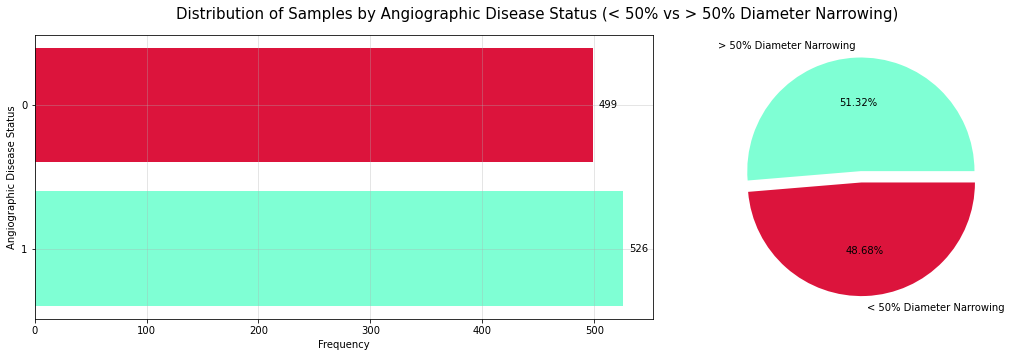

In [4]:
# distribution of samples by target label

target = data['target'].value_counts()
target_labels = ['> 50% Diameter Narrowing', '< 50% Diameter Narrowing']
colors = ['aquamarine', 'crimson']

figure, axes = plt.subplots(1,2, figsize=(15,5), gridspec_kw={'width_ratios':[1.5,1]})
axes[0].barh(y=target.index.astype(str), width=target.values, color=colors)
axes[0].set_xlabel('Frequency')
axes[0].set_ylabel('Angiographic Disease Status')
axes[0].grid(alpha=0.4)

for index, values in enumerate(target):
    axes[0].text(values+5, index, str(values), va='center')
    
axes[1].pie(target.values, labels=target_labels, explode=([0.05]*len(target.index)), autopct='%.2f%%', colors=colors)

figure.suptitle('Distribution of Samples by Angiographic Disease Status (< 50% vs > 50% Diameter Narrowing)', fontsize=15)
plt.tight_layout(pad=1)
plt.show()

#### Question 1 | What is the average age of individuals with < 50% diameter narrowing (target = 0) compared to those with > 50% diameter narrowing (target = 1)? Is there a statistically significant difference in age between the two groups?

C:\Users\65814\AppData\Local\Temp\ipykernel_22776\3818081032.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=data['target'], y=data['age'], palette=colors, ax=axes[1])


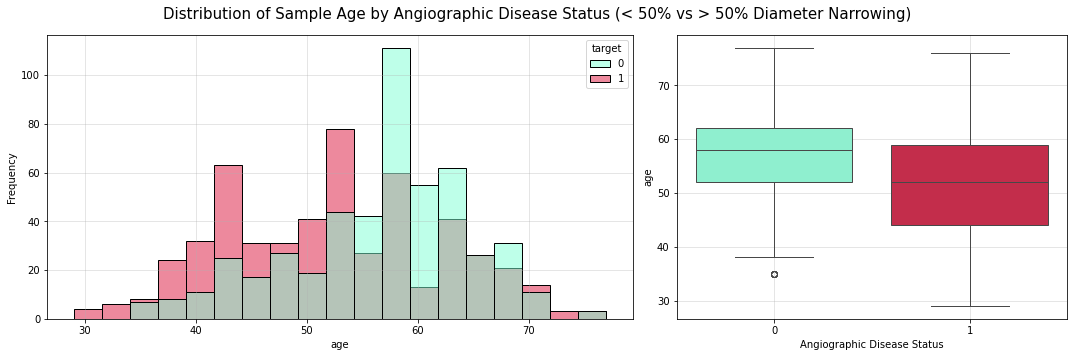

count       mean       std   min   25%   50%   75%   max
target                                                          
0       499.0  56.569138  7.908153  35.0  52.0  58.0  62.0  77.0
1       526.0  52.408745  9.631804  29.0  44.0  52.0  59.0  76.0

Test statistic:  7.5356
Test p-value:  0.0
Reject the null hypothesis. The analysis reveals a statistically significant age difference between individuals with Angiographic Disease Status characterized by < 50% diameter narrowing and those with > 50% diameter narrowing.


In [5]:
from scipy.stats import ttest_ind
# visualization (histogram and boxplot)
figure, axes = plt.subplots(1,2, figsize=(15,5,), gridspec_kw={'width_ratios':[1.5,1]})
sns.histplot(data=data, x=data['age'], hue=data['target'], palette=colors, ax=axes[0])
axes[0].set_ylabel('Frequency')
axes[0].grid(alpha=0.4)
sns.boxplot(data=data, x=data['target'], y=data['age'], palette=colors, ax=axes[1])
axes[1].set_xlabel('Angiographic Disease Status')
axes[1].grid(alpha=0.4)
figure.suptitle('Distribution of Sample Age by Angiographic Disease Status (< 50% vs > 50% Diameter Narrowing)', fontsize=15)
plt.tight_layout(pad=1)
plt.show()

# display the 5 summary statistic
targets = data.groupby('target')
min_narrowing = targets.get_group(0)
sig_narrowing = targets.get_group(1)
display(targets['age'].describe())

# perform an independent T-Test
res = ttest_ind(min_narrowing['age'], sig_narrowing['age'])
test_stat = round(res[0], 4)
pvalue = round(res[1], 4)

print('Test statistic: ', test_stat)
print('Test p-value: ', pvalue)

alpha = 0.05
if pvalue < alpha:
    print('Reject the null hypothesis. The analysis reveals a statistically significant age difference between individuals with Angiographic Disease Status characterized by < 50% diameter narrowing and those with > 50% diameter narrowing.')
else:
    print('Failed to reject null hypothesis. Lack of evidence to conclude a statistically significant difference in age between individuals with Angiographic Disease Status characterized by < 50% diameter narrowing and those with > 50% diameter narrowing.')

#### Question 2 |     What is the distribution of heart disease diagnosis based on gender? Is there a significant association between gender and the likelihood of > 50% diameter narrowing?

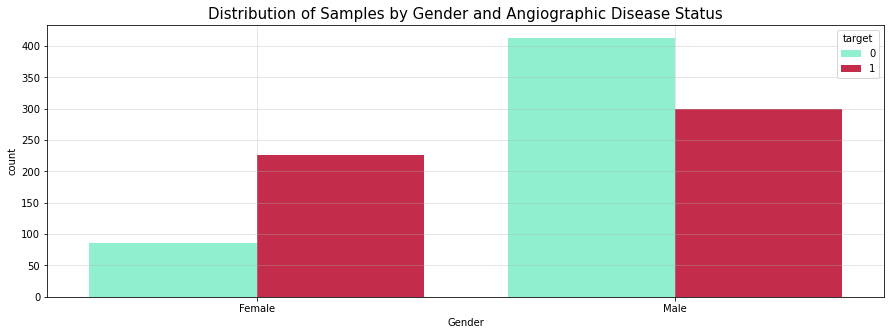

Contingency Table: 


target    0    1
sex             
0        86  226
1       413  300

Expected Frequency: 


target           0           1
sex                           
0       151.890732  160.109268
1       347.109268  365.890732

Test statistic:  78.8631
Test p-value:  0.0
Reject the null hypothesis, indicating a statistically significant link between gender and an increased likelihood of > 50% diameter narrowing.


In [6]:
from scipy.stats import chi2_contingency

# visualization (bar chart)
plt.figure(figsize=(15,5))
sns.countplot(data=data, x=data['sex'], hue=data['target'], palette=colors)
plt.xlabel('Gender')
plt.xticks(ticks=[0, 1], labels=['Female','Male'])
plt.title('Distribution of Samples by Gender and Angiographic Disease Status', fontsize=15)
plt.grid(alpha=0.4)
plt.show()

# perform a chi-square test
contingency_table = pd.crosstab(data['sex'], data['target'])
print('Contingency Table: ')
display(contingency_table)

res = chi2_contingency(contingency_table)
test_stat = round(res[0], 4)
pvalue = round(res[1], 4)
expected_freq = res[3]

print('Expected Frequency: ')
display(pd.DataFrame(expected_freq, columns=contingency_table.columns, index=contingency_table.index))
print('Test statistic: ', test_stat)
print('Test p-value: ', pvalue)

alpha = 0.05
if pvalue < alpha:
    print('Reject the null hypothesis, indicating a statistically significant link between gender and an increased likelihood of > 50% diameter narrowing.')
else:
    print('Failed to reject null hypothesis. Lack of evidence to conclude a statistically significant association between gender and the likelihood of > 50% diameter narrowing.')

#### Question 3 | How does the distribution of chest pain types differ between individuals with < 50% and > 50% diameter narrowing? Is there a statistically significant association between chest pain type and the likelihood of heart disease?

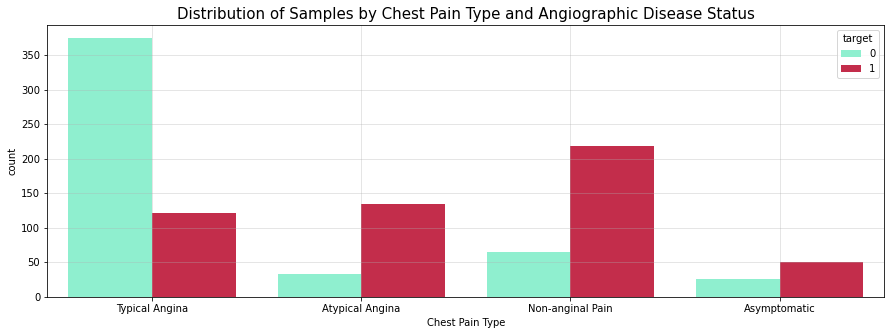

Contingency Table: 


target    0    1
cp              
0       375  122
1        33  134
2        65  219
3        26   51

Expected Frequency: 


target           0           1
cp                            
0       241.954146  255.045854
1        81.300488   85.699512
2       138.259512  145.740488
3        37.485854   39.514146

Test statistic:  280.9822
Test p-value:  0.0
Reject the null hypothesis, indicating a statistically significant link between chest pain type and an increased likelihood of > 50% diameter narrowing.


In [7]:
# visualization (bar chart)
plt.figure(figsize=(15,5))
sns.countplot(data=data, x=data['cp'], hue=data['target'], palette=colors)
plt.xlabel('Chest Pain Type')
plt.xticks(ticks=[0, 1,2,3], labels=['Typical Angina', 'Atypical Angina', 'Non-anginal Pain', 'Asymptomatic'])
plt.title('Distribution of Samples by Chest Pain Type and Angiographic Disease Status', fontsize=15)
plt.grid(alpha=0.4)
plt.show()

# perform a chi-square test
contingency_table = pd.crosstab(data['cp'], data['target'])
print('Contingency Table: ')
display(contingency_table)

res = chi2_contingency(contingency_table)
test_stat = round(res[0], 4)
pvalue = round(res[1], 4)
expected_freq = res[3]

print('Expected Frequency: ')
display(pd.DataFrame(expected_freq, columns=contingency_table.columns, index=contingency_table.index))
print('Test statistic: ', test_stat)
print('Test p-value: ', pvalue)

alpha = 0.05
if pvalue < alpha:
    print('Reject the null hypothesis, indicating a statistically significant link between chest pain type and an increased likelihood of > 50% diameter narrowing.')
else:
    print('Failed to reject null hypothesis. Lack of evidence to conclude a statistically significant association between chest pain type and the likelihood of > 50% diameter narrowing.')

#### Question 4 | What is the average resting blood pressure of individuals with < 50% diameter narrowing (target = 0) compared to those with > 50% diameter narrowing (target = 1)? Is there a statistically significant difference in resting blood pressure between the two groups?

C:\Users\65814\AppData\Local\Temp\ipykernel_22776\935088698.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=data['target'], y=data['trestbps'], palette=colors, ax=axes[1])


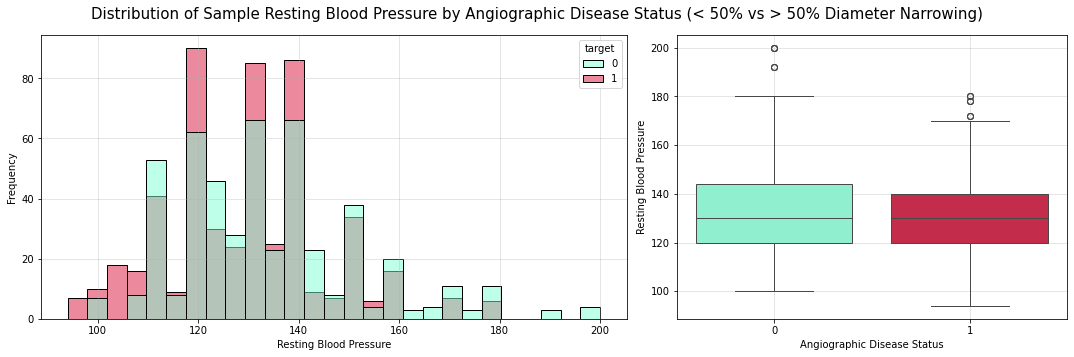

count        mean        std    min    25%    50%    75%    max
target                                                                 
0       499.0  134.106212  18.576736  100.0  120.0  130.0  144.0  200.0
1       526.0  129.245247  16.112188   94.0  120.0  130.0  140.0  180.0

Test statistic:  4.4819
Test p-value:  0.0
Reject the null hypothesis. The analysis reveals a statistically significant resting blood pressure difference between individuals with Angiographic Disease Status characterized by < 50% diameter narrowing and those with > 50% diameter narrowing.


In [8]:
# visualization (histogram and boxplot)
figure, axes = plt.subplots(1,2, figsize=(15,5,), gridspec_kw={'width_ratios':[1.5,1]})
sns.histplot(data=data, x=data['trestbps'], hue=data['target'], palette=colors, ax=axes[0])
axes[0].set_xlabel('Resting Blood Pressure')
axes[0].set_ylabel('Frequency')
axes[0].grid(alpha=0.4)
sns.boxplot(data=data, x=data['target'], y=data['trestbps'], palette=colors, ax=axes[1])
axes[1].set_xlabel('Angiographic Disease Status')
axes[1].set_ylabel('Resting Blood Pressure')
axes[1].grid(alpha=0.4)
figure.suptitle('Distribution of Sample Resting Blood Pressure by Angiographic Disease Status (< 50% vs > 50% Diameter Narrowing)', fontsize=15)
plt.tight_layout(pad=1)
plt.show()

# display the 5 summary statistic
targets = data.groupby('target')
min_narrowing = targets.get_group(0)
sig_narrowing = targets.get_group(1)
display(targets['trestbps'].describe())

# perform an independent T-Test
res = ttest_ind(min_narrowing['trestbps'], sig_narrowing['trestbps'])
test_stat = round(res[0], 4)
pvalue = round(res[1], 4)

print('Test statistic: ', test_stat)
print('Test p-value: ', pvalue)

alpha = 0.05
if pvalue < alpha:
    print('Reject the null hypothesis. The analysis reveals a statistically significant resting blood pressure difference between individuals with Angiographic Disease Status characterized by < 50% diameter narrowing and those with > 50% diameter narrowing.')
else:
    print('Failed to reject null hypothesis. Lack of evidence to conclude a statistically significant difference in resting blood pressure between individuals with Angiographic Disease Status characterized by < 50% diameter narrowing and those with > 50% diameter narrowing.')

#### Question 5 | What is the average serum cholesterol level for individuals with different levels of angiographic disease status? Is there a statistically significant difference in serum cholesterol between 2 groups?

C:\Users\65814\AppData\Local\Temp\ipykernel_22776\3342125469.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=data['target'], y=data['chol'], palette=colors, ax=axes[1])


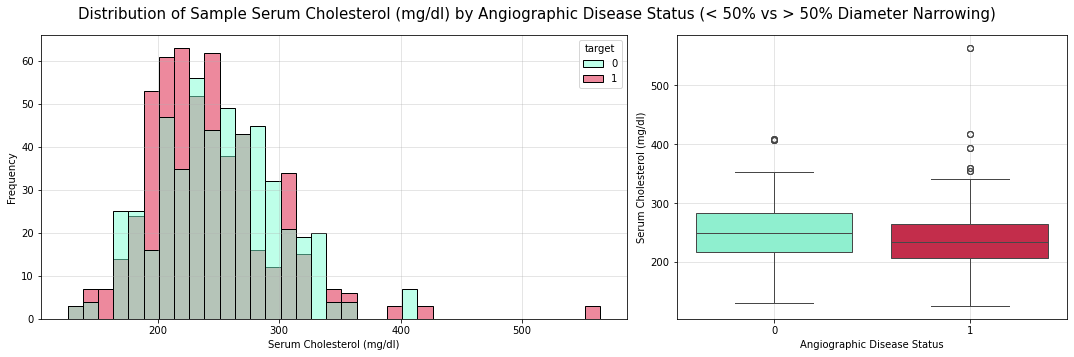

count        mean        std    min    25%    50%     75%    max
target                                                                  
0       499.0  251.292585  49.558924  131.0  217.0  249.0  284.00  409.0
1       526.0  240.979087  53.010345  126.0  208.0  234.0  265.75  564.0

Test statistic:  3.2134
Test p-value:  0.0014
Reject the null hypothesis. The analysis reveals a statistically significant serum cholesterol (mg/dl) difference between individuals with Angiographic Disease Status characterized by < 50% diameter narrowing and those with > 50% diameter narrowing.


In [9]:
# visualization (histogram and boxplot)
figure, axes = plt.subplots(1,2, figsize=(15,5,), gridspec_kw={'width_ratios':[1.5,1]})
sns.histplot(data=data, x=data['chol'], hue=data['target'], palette=colors, ax=axes[0])
axes[0].set_xlabel('Serum Cholesterol (mg/dl)')
axes[0].set_ylabel('Frequency')
axes[0].grid(alpha=0.4)
sns.boxplot(data=data, x=data['target'], y=data['chol'], palette=colors, ax=axes[1])
axes[1].set_xlabel('Angiographic Disease Status')
axes[1].set_ylabel('Serum Cholesterol (mg/dl)')
axes[1].grid(alpha=0.4)
figure.suptitle('Distribution of Sample Serum Cholesterol (mg/dl) by Angiographic Disease Status (< 50% vs > 50% Diameter Narrowing)', fontsize=15)
plt.tight_layout(pad=1)
plt.show()

# display the 5 summary statistic
targets = data.groupby('target')
min_narrowing = targets.get_group(0)
sig_narrowing = targets.get_group(1)
display(targets['chol'].describe())

# perform an independent T-Test
res = ttest_ind(min_narrowing['chol'], sig_narrowing['chol'])
test_stat = round(res[0], 4)
pvalue = round(res[1], 4)

print('Test statistic: ', test_stat)
print('Test p-value: ', pvalue)

alpha = 0.05
if pvalue < alpha:
    print('Reject the null hypothesis. The analysis reveals a statistically significant serum cholesterol (mg/dl) difference between individuals with Angiographic Disease Status characterized by < 50% diameter narrowing and those with > 50% diameter narrowing.')
else:
    print('Failed to reject null hypothesis. Lack of evidence to conclude a statistically significant difference in serum cholesterol (mg/dl) between individuals with Angiographic Disease Status characterized by < 50% diameter narrowing and those with > 50% diameter narrowing.')

#### Question 6  | How does the prevalence of fasting blood sugar levels greater than 120 mg/dl vary between individuals with < 50% and > 50% diameter narrowing in angiographic disease status categories? Is there a statistically significant association between fasting blood sugar levels and the likelihood of more severe angiographic disease (> 50% diameter narrowing)?

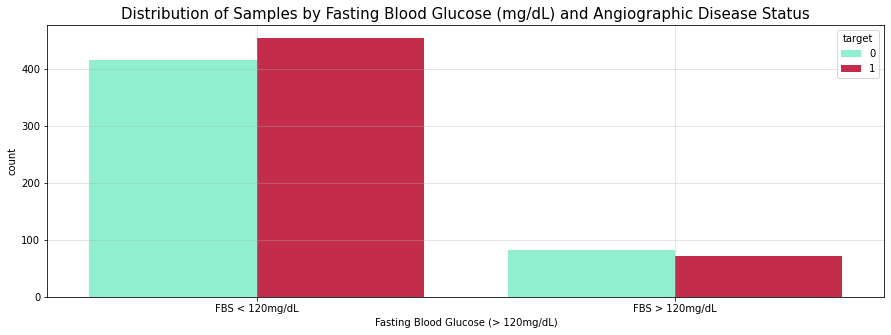

Contingency Table: 


target    0    1
fbs             
0       417  455
1        82   71

Expected Frequency: 


target           0           1
fbs                           
0       424.515122  447.484878
1        74.484878   78.515122

Test statistic:  1.5134
Test p-value:  0.2186
Failed to reject null hypothesis. Lack of evidence to conclude a statistically significant association between fasting blood glucose level and the likelihood of > 50% diameter narrowing.


In [10]:
# visualization (bar chart)
plt.figure(figsize=(15,5))
sns.countplot(data=data, x=data['fbs'], hue=data['target'], palette=colors)
plt.xlabel('Fasting Blood Glucose (> 120mg/dL)')
plt.xticks(ticks=[0,1], labels=['FBS < 120mg/dL', 'FBS > 120mg/dL'])
plt.title('Distribution of Samples by Fasting Blood Glucose (mg/dL) and Angiographic Disease Status', fontsize=15)
plt.grid(alpha=0.4)
plt.show()

# perform a chi-square test
contingency_table = pd.crosstab(data['fbs'], data['target'])
print('Contingency Table: ')
display(contingency_table)

res = chi2_contingency(contingency_table)
test_stat = round(res[0], 4)
pvalue = round(res[1], 4)
expected_freq = res[3]

print('Expected Frequency: ')
display(pd.DataFrame(expected_freq, columns=contingency_table.columns, index=contingency_table.index))
print('Test statistic: ', test_stat)
print('Test p-value: ', pvalue)

alpha = 0.05
if pvalue < alpha:
    print('Reject the null hypothesis, indicating a statistically significant association between fasting blood glucose level and an increased likelihood of > 50% diameter narrowing.')
else:
    print('Failed to reject null hypothesis. Lack of evidence to conclude a statistically significant association between fasting blood glucose level and the likelihood of > 50% diameter narrowing.')

#### Question 7 | How does the distribution of resting electrocardiographic results (categories 0, 1, and 2) vary between individuals with < 50% and > 50% diameter narrowing in angiographic disease status categories? Is there a statistically significant association between resting electrocardiographic results and the likelihood of more severe angiographic disease (> 50% diameter narrowing)?

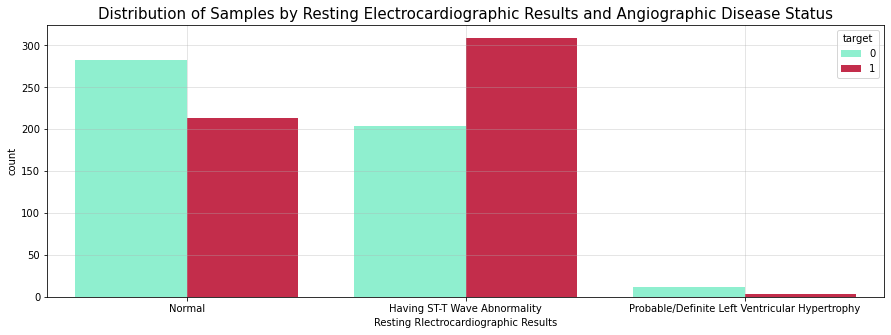

Contingency Table: 


target     0    1
restecg          
0        283  214
1        204  309
2         12    3

Expected Frequency: 


target            0           1
restecg                        
0        241.954146  255.045854
1        249.743415  263.256585
2          7.302439    7.697561

Test statistic:  35.7843
Test p-value:  0.0
Reject the null hypothesis, indicating a statistically significant association between resting electrocardiographic results and an increased likelihood of > 50% diameter narrowing.


In [11]:
# visualization (bar chart)
plt.figure(figsize=(15,5))
sns.countplot(data=data, x=data['restecg'], hue=data['target'], palette=colors)
plt.xlabel('Resting Rlectrocardiographic Results')
plt.xticks(ticks=[0,1,2], labels=['Normal','Having ST-T Wave Abnormality', 'Probable/Definite Left Ventricular Hypertrophy'])
plt.title('Distribution of Samples by Resting Electrocardiographic Results and Angiographic Disease Status', fontsize=15)
plt.grid(alpha=0.4)
plt.show()

# perform a chi-square test
contingency_table = pd.crosstab(data['restecg'], data['target'])
print('Contingency Table: ')
display(contingency_table)

res = chi2_contingency(contingency_table)
test_stat = round(res[0], 4)
pvalue = round(res[1], 4)
expected_freq = res[3]

print('Expected Frequency: ')
display(pd.DataFrame(expected_freq, columns=contingency_table.columns, index=contingency_table.index))
print('Test statistic: ', test_stat)
print('Test p-value: ', pvalue)

alpha = 0.05
if pvalue < alpha:
    print('Reject the null hypothesis, indicating a statistically significant association between resting electrocardiographic results and an increased likelihood of > 50% diameter narrowing.')
else:
    print('Failed to reject null hypothesis. Lack of evidence to conclude a statistically significant association between resting electrocardiographic results and the likelihood of > 50% diameter narrowing.')

#### Question 8 | Is there a statistically significant difference in maximum heart rate achieved between individuals with < 50% and > 50% diameter narrowing?

C:\Users\65814\AppData\Local\Temp\ipykernel_22776\2545199680.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=data['target'], y=data['thalach'], palette=colors, ax=axes[1])


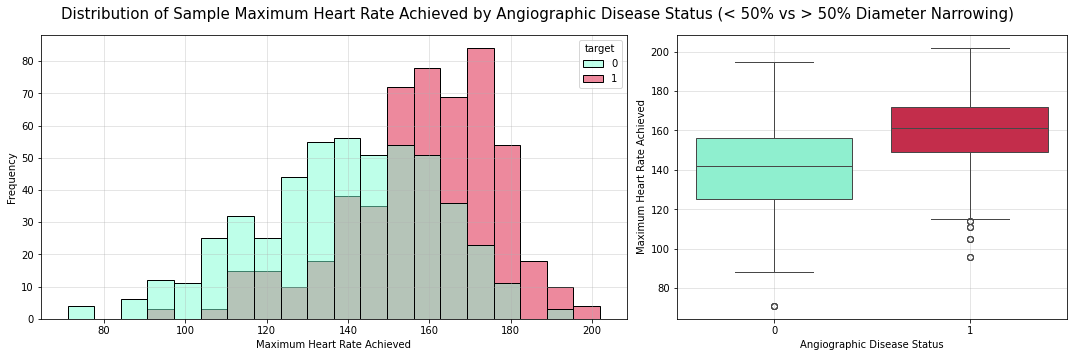

count        mean        std   min    25%    50%    75%    max
target                                                                
0       499.0  139.130261  22.565235  71.0  125.0  142.0  156.0  195.0
1       526.0  158.585551  19.096928  96.0  149.0  161.5  172.0  202.0

Test statistic:  -14.9265
Test p-value:  0.0
Reject the null hypothesis. The analysis reveals a statistically significant difference in maximum heart rate achieved between individuals with Angiographic Disease Status characterized by < 50% diameter narrowing and those with > 50% diameter narrowing.


In [12]:
# visualization (histogram and boxplot)
figure, axes = plt.subplots(1,2, figsize=(15,5,), gridspec_kw={'width_ratios':[1.5,1]})
sns.histplot(data=data, x=data['thalach'], hue=data['target'], palette=colors, ax=axes[0])
axes[0].set_xlabel('Maximum Heart Rate Achieved')
axes[0].set_ylabel('Frequency')
axes[0].grid(alpha=0.4)
sns.boxplot(data=data, x=data['target'], y=data['thalach'], palette=colors, ax=axes[1])
axes[1].set_xlabel('Angiographic Disease Status')
axes[1].set_ylabel('Maximum Heart Rate Achieved')
axes[1].grid(alpha=0.4)
figure.suptitle('Distribution of Sample Maximum Heart Rate Achieved by Angiographic Disease Status (< 50% vs > 50% Diameter Narrowing)', fontsize=15)
plt.tight_layout(pad=1)
plt.show()

# display the 5 summary statistic
targets = data.groupby('target')
min_narrowing = targets.get_group(0)
sig_narrowing = targets.get_group(1)
display(targets['thalach'].describe())

# perform an independent T-Test
res = ttest_ind(min_narrowing['thalach'], sig_narrowing['thalach'])
test_stat = round(res[0], 4)
pvalue = round(res[1], 4)

print('Test statistic: ', test_stat)
print('Test p-value: ', pvalue)

alpha = 0.05
if pvalue < alpha:
    print('Reject the null hypothesis. The analysis reveals a statistically significant difference in maximum heart rate achieved between individuals with Angiographic Disease Status characterized by < 50% diameter narrowing and those with > 50% diameter narrowing.')
else:
    print('Failed to reject null hypothesis. Lack of evidence to conclude a statistically significant difference in maximum heart rate achieved between individuals with Angiographic Disease Status characterized by < 50% diameter narrowing and those with > 50% diameter narrowing.')

#### Question 9  | What is the prevalence of exercise-induced angina in individuals with different angiographic disease statuses? Is there a statistically significant association bteween exercise-induced angina and angiographic disease?

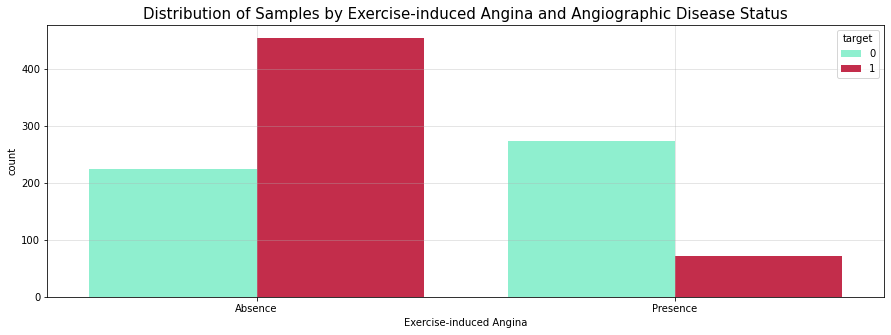

Contingency Table: 


target    0    1
exang           
0       225  455
1       274   71

Expected Frequency: 


target           0           1
exang                         
0       331.043902  348.956098
1       167.956098  177.043902

Test statistic:  194.8155
Test p-value:  0.0
Reject the null hypothesis, indicating a statistically significant association between exercise-induced angina and an increased likelihood of > 50% diameter narrowing.


In [13]:
# visualization (bar chart)
plt.figure(figsize=(15,5))
sns.countplot(data=data, x=data['exang'], hue=data['target'], palette=colors)
plt.xlabel('Exercise-induced Angina')
plt.xticks(ticks=[0,1], labels=['Absence','Presence'])
plt.title('Distribution of Samples by Exercise-induced Angina and Angiographic Disease Status', fontsize=15)
plt.grid(alpha=0.4)
plt.show()

# perform a chi-square test
contingency_table = pd.crosstab(data['exang'], data['target'])
print('Contingency Table: ')
display(contingency_table)

res = chi2_contingency(contingency_table)
test_stat = round(res[0], 4)
pvalue = round(res[1], 4)
expected_freq = res[3]

print('Expected Frequency: ')
display(pd.DataFrame(expected_freq, columns=contingency_table.columns, index=contingency_table.index))
print('Test statistic: ', test_stat)
print('Test p-value: ', pvalue)

alpha = 0.05
if pvalue < alpha:
    print('Reject the null hypothesis, indicating a statistically significant association between exercise-induced angina and an increased likelihood of > 50% diameter narrowing.')
else:
    print('Failed to reject null hypothesis. Lack of evidence to conclude a statistically significant association between exercise-induced angina and the likelihood of > 50% diameter narrowing.')

#### Question 10 | Is there a statistically significant difference between the ST depression induced by exercise to rest ratio and the likelihood of > 50% diameter narrowing?

C:\Users\65814\AppData\Local\Temp\ipykernel_22776\2468037793.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=data['target'], y=data['oldpeak'], palette=colors, ax=axes[1])


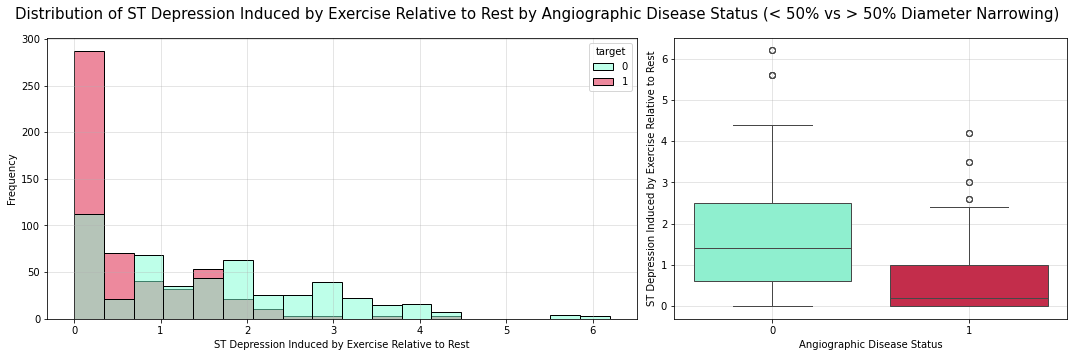

count      mean       std  min  25%  50%  75%  max
target                                                    
0       499.0  1.600200  1.290956  0.0  0.6  1.4  2.5  6.2
1       526.0  0.569962  0.771079  0.0  0.0  0.2  1.0  4.2

Test statistic:  15.6029
Test p-value:  0.0
Reject the null hypothesis. The analysis reveals a statistically significant difference in ST depression induced by exercise relative to rest between individuals with Angiographic Disease Status characterized by < 50% diameter narrowing and those with > 50% diameter narrowing.


In [14]:
# visualization (histogram and boxplot)
figure, axes = plt.subplots(1,2, figsize=(15,5,), gridspec_kw={'width_ratios':[1.5,1]})
sns.histplot(data=data, x=data['oldpeak'], hue=data['target'], palette=colors, ax=axes[0])
axes[0].set_xlabel('ST Depression Induced by Exercise Relative to Rest')
axes[0].set_ylabel('Frequency')
axes[0].grid(alpha=0.4)
sns.boxplot(data=data, x=data['target'], y=data['oldpeak'], palette=colors, ax=axes[1])
axes[1].set_xlabel('Angiographic Disease Status')
axes[1].set_ylabel('ST Depression Induced by Exercise Relative to Rest')
axes[1].grid(alpha=0.4)
figure.suptitle('Distribution of ST Depression Induced by Exercise Relative to Rest by Angiographic Disease Status (< 50% vs > 50% Diameter Narrowing)', fontsize=15)
plt.tight_layout(pad=1)
plt.show()

# display the 5 summary statistic
targets = data.groupby('target')
min_narrowing = targets.get_group(0)
sig_narrowing = targets.get_group(1)
display(targets['oldpeak'].describe())

# perform an independent T-Test
res = ttest_ind(min_narrowing['oldpeak'], sig_narrowing['oldpeak'])
test_stat = round(res[0], 4)
pvalue = round(res[1], 4)

print('Test statistic: ', test_stat)
print('Test p-value: ', pvalue)

alpha = 0.05
if pvalue < alpha:
    print('Reject the null hypothesis. The analysis reveals a statistically significant difference in ST depression induced by exercise relative to rest between individuals with Angiographic Disease Status characterized by < 50% diameter narrowing and those with > 50% diameter narrowing.')
else:
    print('Failed to reject null hypothesis. Lack of evidence to conclude a statistically significant difference in ST depression induced by exercise relative to rest between individuals with Angiographic Disease Status characterized by < 50% diameter narrowing and those with > 50% diameter narrowing.')

#### Question 11 | How does the distribution of the slope of the peak exercise ST segment vary between individuals with < 50% and > 50% diameter narrowing in angiographic disease status categories? Is there a statistically significant association between the slope of the peak exercise ST segment and the severity of angiographic disease?

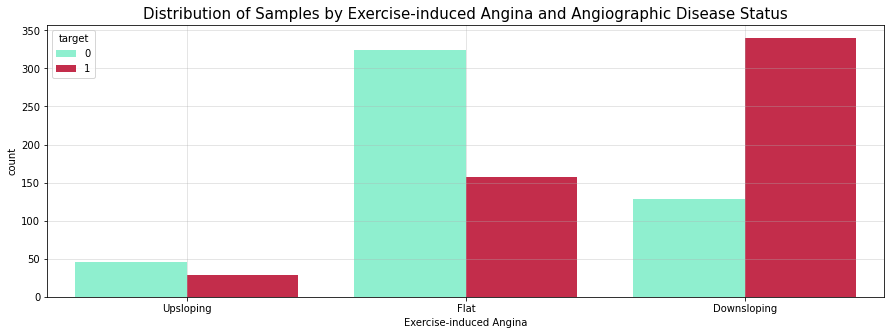

Contingency Table: 


target    0    1
slope           
0        46   28
1       324  158
2       129  340

Expected Frequency: 


target           0           1
slope                         
0        36.025366   37.974634
1       234.651707  247.348293
2       228.322927  240.677073

Test statistic:  155.8729
Test p-value:  0.0
Reject the null hypothesis, indicating a statistically significant association between the slope of the peak exercise ST segment and an increased likelihood of > 50% diameter narrowing.


In [15]:
# visualization (bar chart)
plt.figure(figsize=(15,5))
sns.countplot(data=data, x=data['slope'], hue=data['target'], palette=colors)
plt.xlabel('Exercise-induced Angina')
plt.xticks(ticks=[0,1,2], labels=['Upsloping','Flat','Downsloping'])
plt.title('Distribution of Samples by Exercise-induced Angina and Angiographic Disease Status', fontsize=15)
plt.grid(alpha=0.4)
plt.show()

# perform a chi-square test
contingency_table = pd.crosstab(data['slope'], data['target'])
print('Contingency Table: ')
display(contingency_table)

res = chi2_contingency(contingency_table)
test_stat = round(res[0], 4)
pvalue = round(res[1], 4)
expected_freq = res[3]

print('Expected Frequency: ')
display(pd.DataFrame(expected_freq, columns=contingency_table.columns, index=contingency_table.index))
print('Test statistic: ', test_stat)
print('Test p-value: ', pvalue)

alpha = 0.05
if pvalue < alpha:
    print('Reject the null hypothesis, indicating a statistically significant association between the slope of the peak exercise ST segment and an increased likelihood of > 50% diameter narrowing.')
else:
    print('Failed to reject null hypothesis. Lack of evidence to conclude a statistically significant association between the slope of the peak exercise ST segment and the likelihood of > 50% diameter narrowing.')

#### Question 12 | What is the association between the number of major vessels, each categorized by different levels of blockage or narrowing (0-3), and the severity of angiographic disease? How does the distribution of vessels with no blockage, mild, moderate, and severe blockage vary across angiographic disease statuses?

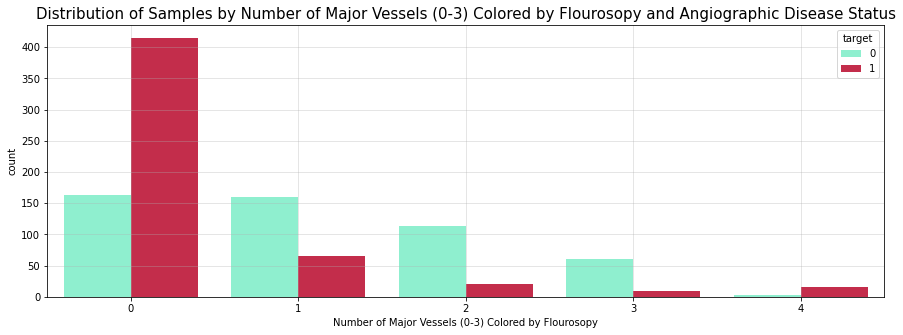

Contingency Table: 


target    0    1
ca              
0       163  415
1       160   66
2       113   21
3        60    9
4         3   15

Expected Frequency: 


target           0           1
ca                            
0       281.387317  296.612683
1       110.023415  115.976585
2        65.235122   68.764878
3        33.591220   35.408780
4         8.762927    9.237073

Test statistic:  257.293
Test p-value:  0.0
Reject the null hypothesis, indicating a statistically significant association between number of major vessels (0-3) colored by flourosopy and an increased likelihood of > 50% diameter narrowing.


In [16]:
# visualization (bar chart)
plt.figure(figsize=(15,5))
sns.countplot(data=data, x=data['ca'], hue=data['target'], palette=colors)
plt.xlabel('Number of Major Vessels (0-3) Colored by Flourosopy')
plt.title('Distribution of Samples by Number of Major Vessels (0-3) Colored by Flourosopy and Angiographic Disease Status', fontsize=15)
plt.grid(alpha=0.4)
plt.show()

# perform a chi-square test
contingency_table = pd.crosstab(data['ca'], data['target'])
print('Contingency Table: ')
display(contingency_table)

res = chi2_contingency(contingency_table)
test_stat = round(res[0], 4)
pvalue = round(res[1], 4)
expected_freq = res[3]

print('Expected Frequency: ')
display(pd.DataFrame(expected_freq, columns=contingency_table.columns, index=contingency_table.index))
print('Test statistic: ', test_stat)
print('Test p-value: ', pvalue)

alpha = 0.05
if pvalue < alpha:
    print('Reject the null hypothesis, indicating a statistically significant association between number of major vessels (0-3) colored by flourosopy and an increased likelihood of > 50% diameter narrowing.')
else:
    print('Failed to reject null hypothesis. Lack of evidence to conclude a statistically significant association between number of major vessels (0-3) colored by flourosopy and the likelihood of > 50% diameter narrowing.')

#### Question 13 | How are the Thallium-201 imaging findings related to angiographic disease status? Is there a statistically significant association between the Thallium-201 imaging results and the severity of angiographic disease?

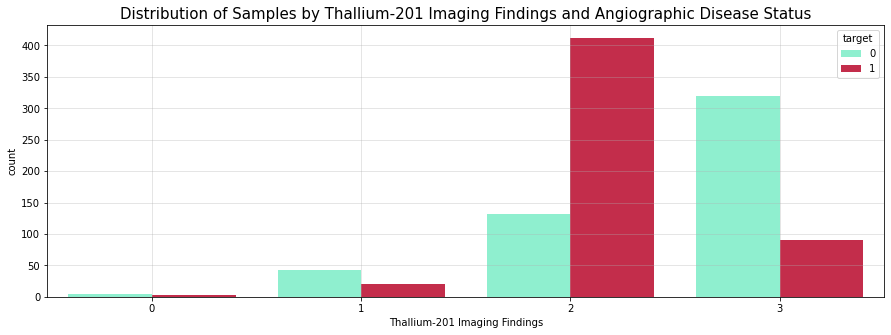

Contingency Table: 


target    0    1
thal            
0         4    3
1        43   21
2       132  412
3       320   90

Expected Frequency: 


target           0           1
thal                          
0         3.407805    3.592195
1        31.157073   32.842927
2       264.835122  279.164878
3       199.600000  210.400000

Test statistic:  280.3307
Test p-value:  0.0
Reject the null hypothesis, indicating a statistically significant association between Thallium-201 imaging findings and an increased likelihood of > 50% diameter narrowing.


In [17]:
# visualization (bar chart)
plt.figure(figsize=(15,5))
sns.countplot(data=data, x=data['thal'], hue=data['target'], palette=colors)
plt.xlabel('Thallium-201 Imaging Findings')
plt.title('Distribution of Samples by Thallium-201 Imaging Findings and Angiographic Disease Status', fontsize=15)
plt.grid(alpha=0.4)
plt.show()

# perform a chi-square test
contingency_table = pd.crosstab(data['thal'], data['target'])
print('Contingency Table: ')
display(contingency_table)

res = chi2_contingency(contingency_table)
test_stat = round(res[0], 4)
pvalue = round(res[1], 4)
expected_freq = res[3]

print('Expected Frequency: ')
display(pd.DataFrame(expected_freq, columns=contingency_table.columns, index=contingency_table.index))
print('Test statistic: ', test_stat)
print('Test p-value: ', pvalue)

alpha = 0.05
if pvalue < alpha:
    print('Reject the null hypothesis, indicating a statistically significant association between Thallium-201 imaging findings and an increased likelihood of > 50% diameter narrowing.')
else:
    print('Failed to reject null hypothesis. Lack of evidence to conclude a statistically significant association between Thallium-201 imaging findings and the likelihood of > 50% diameter narrowing.')

#### Question 14 | Is there any correlation between age and other key measurements (resting blood pressure, serum cholesterol, maximum heart rate achieved, ST depression induced by exercise relative to rest)?

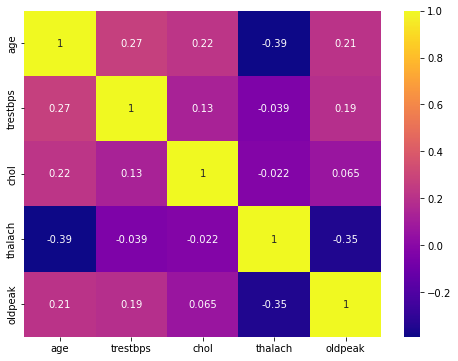

In [18]:
fil_data = data[['age','trestbps','chol','thalach','oldpeak']]

# compute the Pearson's correlation
correlation = fil_data.corr()

# visualize the correlation in heatmap
plt.figure(figsize=(8,6))
sns.heatmap(correlation, annot=True, cmap='plasma')
plt.show()

### Data Preprocessing for Modelling

In [19]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.2, random_state=122)

# check the dimension of the dataset
print('Training dataset: ', train.shape)
print('Test dataset: ', test.shape)

Training dataset:  (820, 14)
Test dataset:  (205, 14)


In [20]:
# segregate the feature matrix and target vector
Xtrain = train.drop(columns=['target'], axis=1)
ytrain = train['target']

Xtest = test.drop(columns=['target'], axis=1)
ytest = test['target']

In [21]:
# scale the training and test data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
Xtrain_scaled = scaler.fit_transform(Xtrain)
Xtest_scaled = scaler.transform(Xtest)

### Predictive Analytics: Classification 

#### Model 1 | Decision Tree

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# create a Decision Tree Classifier
tree = DecisionTreeClassifier(random_state=122)

# Define the hyperparameter grid
param_grid = {
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [2, 4]
}

# create the GridSearchCV object
grid_search_tree = GridSearchCV(tree, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)

# fit the grid search to the data
grid_search_tree.fit(Xtrain_scaled, ytrain)

# print the best parameters and the corresponding accuracy
print('Best Parameters: ', grid_search_tree.best_params_)
print('Best AUROC: ', grid_search_tree.best_score_)

# get the best model
best_tree = grid_search_tree.best_estimator_

Best Parameters:  {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best AUROC:  0.973498863152856


#### Model 2 | Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression

# create a logistic regression Classifier
logreg = LogisticRegression(random_state=122, max_iter=5000)

# define the hyperparameter grid
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}

# create the GridSearchCV object
grid_search_logreg = GridSearchCV(logreg, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)

# fit the grid search to the data
grid_search_logreg.fit(Xtrain_scaled, ytrain)

# print the best parameters and the corresponding accuracy
print('Best Parameters: ', grid_search_logreg.best_params_)
print('Best AUROC: ', grid_search_logreg.best_score_)

# get the best model
best_logreg = grid_search_logreg.best_estimator_

Best Parameters:  {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
Best AUROC:  0.9240372921320427


#### Model 3 | Random Forest

In [25]:
from sklearn.ensemble import RandomForestClassifier

# create a Random Forest Classifier
forest = RandomForestClassifier(random_state=122)

# define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [2, 4]
}

# create the GridSearchCV object
grid_search_forest = GridSearchCV(forest, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)

# fit the grid search to the data
grid_search_forest.fit(Xtrain_scaled, ytrain)

# print the best parameters and the corresponding accuracy
print('Best Parameters: ', grid_search_forest.best_params_)
print('Best AUROC: ', grid_search_forest.best_score_)

# get the best model
best_forest = grid_search_forest.best_estimator_

Best Parameters:  {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}
Best AUROC:  0.9952646216714534


#### Model 4 | Naive Bayes

In [26]:
from sklearn.naive_bayes import ComplementNB 

# create a Naive Bayes classifier
clf = ComplementNB()

# fit the classifier with training data
cNB = clf.fit(Xtrain_scaled, ytrain)

#### Model 5 | KNearestNeighbors

In [27]:
from sklearn.neighbors import KNeighborsClassifier

# create the KNN classifier
knn = KNeighborsClassifier()

# define the parameter grid for hyperparameter tuning
param_grid = {
    'n_neighbors': np.arange(1, 21),  
    'p': [1, 2]  # 1 for Manhattan distance (L1), 2 for Euclidean distance (L2)
}

# create a GridSearchCV object with KNN and the parameter grid
grid_search_knn = GridSearchCV(knn, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)

# fit the model with the training data
grid_search_knn.fit(Xtrain_scaled,ytrain)

# print the best parameters and the corresponding accuracy
print('Best Parameters: ', grid_search_knn.best_params_)
print('Best AUROC: ', grid_search_knn.best_score_)

# get the best model
best_knn = grid_search_knn.best_estimator_

Best Parameters:  {'n_neighbors': 1, 'p': 1}
Best AUROC:  0.9708012888699784


#### Model 6 | Support Vector Machine (SVM)

In [28]:
from sklearn.svm import SVC

# create the SVM classifier
svc = SVC(random_state=122)

# define the parameter grid for hyperparameter tuning
param_grid = {
    'C': [0.1, 1, 10, 100],                 # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly'],    # Choice of kernel
    'gamma': ['scale', 'auto', 0.1, 1],     # Kernel coefficient for 'rbf' and 'poly'
    'degree': [2, 3, 4]                     # Degree of the polynomial kernel
}

# create a GridSearchCV object with SVM and the parameter grid
grid_search_svc = GridSearchCV(svc, param_grid, cv=5, scoring='roc_auc')

# fit the model with the training data
grid_search_svc.fit(Xtrain_scaled,ytrain)

# print the best parameters and the corresponding accuracy
print('Best Parameters: ', grid_search_svc.best_params_)
print('Best AUROC: ', grid_search_svc.best_score_)

# get the best model
best_svc = grid_search_svc.best_estimator_

Best Parameters:  {'C': 10, 'degree': 2, 'gamma': 1, 'kernel': 'rbf'}
Best AUROC:  0.9946410399602879


### Performance Evaluation & Model Comparison

In [29]:
# define a helper function to perform model evaluation based on key metrics
from sklearn.metrics import precision_recall_fscore_support

def performance_evaluation(X,y,clf,classifier_name=''):
    ypred = clf.predict(X)
    accuracy = clf.score(X,y)
    precision, recall, fscore, support = precision_recall_fscore_support(y, ypred, average='macro', zero_division=0)
    metricName = ['Accuracy','Precision','Recall','F1_Score']
    metricValue = [accuracy,precision,recall,fscore]
    res = pd.DataFrame(metricValue, index=metricName, columns=[classifier_name])
    return res

In [30]:
# generate the performance summary for various models trained
tree_summary = performance_evaluation(Xtest_scaled,ytest,best_tree,'Decision Tree')
logistic_summary = performance_evaluation(Xtest_scaled,ytest,best_logreg,'Logistic Regression')
forest_summary = performance_evaluation(Xtest_scaled,ytest,best_forest,'Random Forest')
naivebayes_summary = performance_evaluation(Xtest_scaled,ytest,cNB,'Naive Bayes')
knn_summary = performance_evaluation(Xtest_scaled,ytest,best_knn,'K Nearest Neigbors')
svc_summary = performance_evaluation(Xtest_scaled,ytest,best_svc,'Support Vector Machine')

# combine the summary of each model into a dataframe 
comparison_df = pd.concat([tree_summary,forest_summary,logistic_summary,naivebayes_summary,knn_summary,svc_summary], axis=1)

# disply the summary dafaframe
display(comparison_df)

Decision Tree  Random Forest  Logistic Regression  Naive Bayes  \
Accuracy        0.941463       0.985366             0.829268     0.780488   
Precision       0.941667       0.985714             0.836597     0.785112   
Recall          0.941414       0.985437             0.828907     0.780173   
F1_Score        0.941451       0.985364             0.828222     0.779459   

           K Nearest Neigbors  Support Vector Machine  
Accuracy             0.985366                0.951220  
Precision            0.985714                0.951429  
Recall               0.985437                0.951171  
F1_Score             0.985364                0.951209

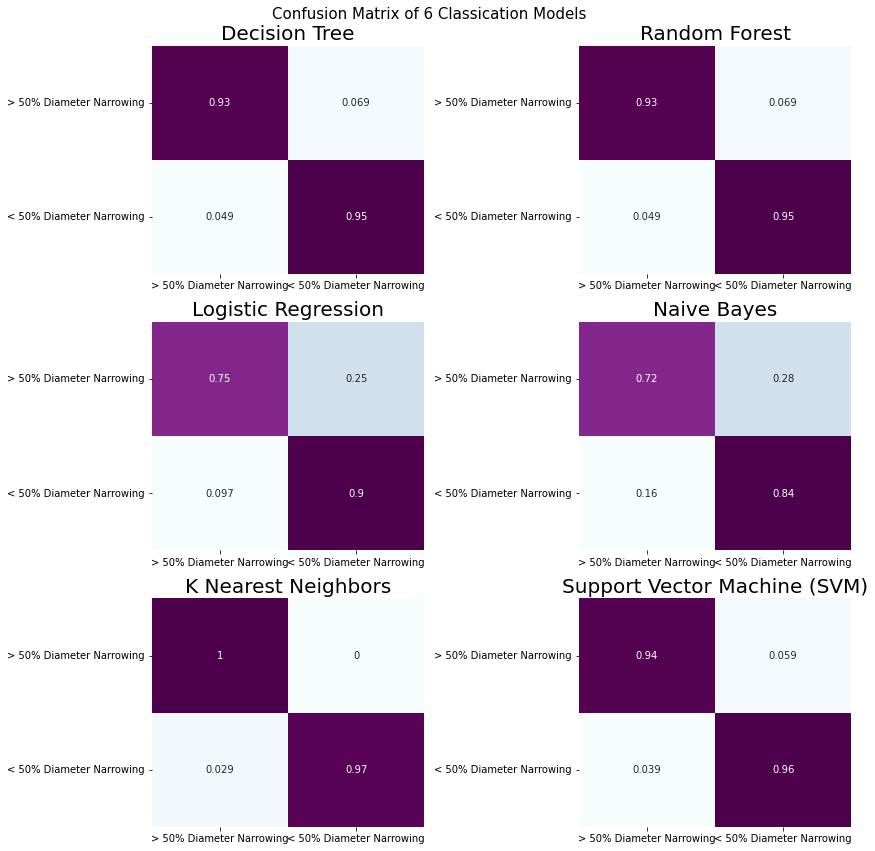

In [31]:
# visualize the confusion matrix using a heatmap
from sklearn.metrics import confusion_matrix

labels = ['> 50% Diameter Narrowing', '< 50% Diameter Narrowing']

ypred_tree = best_tree.predict(Xtest_scaled)
cm_tree = confusion_matrix(ytest, ypred_tree, normalize='true')

ypred_forest = best_forest.predict(Xtest_scaled)
cm_forest = confusion_matrix(ytest, ypred_tree, normalize='true')

ypred_logistic = best_logreg.predict(Xtest_scaled)
cm_logistic = confusion_matrix(ytest, ypred_logistic, normalize='true')

ypred_nb = cNB.predict(Xtest_scaled)
cm_nb = confusion_matrix(ytest, ypred_nb, normalize='true')

ypred_knn = best_knn.predict(Xtest_scaled)
cm_knn = confusion_matrix(ytest, ypred_knn, normalize='true')

ypred_svc = best_svc.predict(Xtest_scaled)
cm_svc = confusion_matrix(ytest, ypred_svc, normalize='true')


# confusion matrix for 6 classification models
figure, axes = plt.subplots(3,2, figsize=(12,12))
sns.heatmap(cm_tree, annot=True, cmap='BuPu', xticklabels=labels, yticklabels=labels, cbar=False, ax=axes[0,0])
axes[0,0].set_title('Decision Tree', fontsize=20)
sns.heatmap(cm_forest, annot=True, cmap='BuPu', xticklabels=labels, yticklabels=labels, cbar=False, ax=axes[0,1])
axes[0,1].set_title('Random Forest', fontsize=20)
sns.heatmap(cm_logistic, annot=True, cmap='BuPu', xticklabels=labels, yticklabels=labels, cbar=False, ax=axes[1,0])
axes[1,0].set_title('Logistic Regression', fontsize=20)
sns.heatmap(cm_nb, annot=True, cmap='BuPu', xticklabels=labels, yticklabels=labels, cbar=False, ax=axes[1,1])
axes[1,1].set_title('Naive Bayes', fontsize=20)
sns.heatmap(cm_knn, annot=True, cmap='BuPu', xticklabels=labels, yticklabels=labels, cbar=False, ax=axes[2,0])
axes[2,0].set_title('K Nearest Neighbors', fontsize=20)
sns.heatmap(cm_svc, annot=True, cmap='BuPu', xticklabels=labels, yticklabels=labels, cbar=False, ax=axes[2,1])
axes[2,1].set_title('Support Vector Machine (SVM)', fontsize=20)

figure.suptitle('Confusion Matrix of 6 Classication Models', fontsize=15)
plt.tight_layout(pad=1)
plt.show()

#### Summary:

The statistical analysis investigated various features in relation to angiographic disease status, and the results provide valuable insights into the factors associated with different levels of diameter narrowing. Age, gender, chest pain type, resting blood pressure, serum cholesterol, resting electrocardiographic results, maximum heart rate achieved, exercise-induced angina, ST depression induced by exercise relative to rest, the slope of the peak exercise ST segment, the number of major vessels colored by fluoroscopy, and Thallium-201 imaging findings all exhibited statistically significant associations with an increased likelihood of > 50% diameter narrowing. These findings underscore the importance of considering a comprehensive set of clinical and diagnostic features in understanding and predicting the severity of angiographic disease. The lack of a statistically significant association with fasting blood glucose level suggests that this specific variable may not be a strong predictor of more severe diameter narrowing. Overall, these results contribute to a deeper understanding of the multifaceted factors influencing angiographic disease status.

In the evaluation of six different classification models—Decision Tree, Random Forest, Logistic Regression, Naive Bayes, K Nearest Neighbors, and Support Vector Machine—on the test dataset, their respective performance metrics provide valuable insights into their predictive capabilities for angiographic disease status. Both Decision Tree and Random Forest models demonstrate exceptionally high accuracy, precision, recall, and F1 Score, suggesting robust performance in distinguishing between different levels of diameter narrowing. Logistic Regression, although exhibiting lower metrics compared to the tree-based models, still demonstrates respectable accuracy and precision. Naive Bayes, while achieving relatively lower performance compared to other models, provides a balanced trade-off between precision and recall. Both K Nearest Neighbors and Support Vector Machine models showcase similar high performance across all metrics, emphasizing their effectiveness in predicting angiographic disease status. The detailed statistical analysis of these models contributes to a comprehensive understanding of their strengths and limitations, aiding in the selection of an appropriate model based on specific objectives and considerations.